 Importing necessary libraries. And Setting the dataset path.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "\modak-classifier"

CATEGORIES = ["modak-image", "non-modak-image"]
     

 Converting images to array.

In [2]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)   

In [3]:
print(img_array)

[[225 227 230 ... 181 180 179]
 [224 226 230 ... 181 180 179]
 [223 225 229 ... 181 180 179]
 ...
 [179 178 177 ... 165 169 167]
 [183 181 177 ... 166 170 168]
 [178 179 179 ... 166 169 171]]


In [4]:
print(img_array.shape)

(193, 261)


Setting all image to a same size.

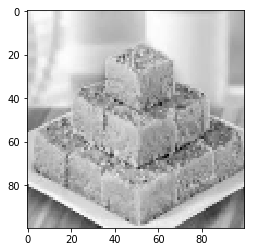

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Making executable training data to fit in the model, with label.

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:00<00:00, 1193.67it/s]

100


We suffle the data to get accurate measure. 

In [7]:
import random

random.shuffle(training_data)

Print Labels of the suffled data.

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
0
1
0
1


Set X and y as the training dataset with reshaping the image.

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[ 97]
   [103]
   [108]
   ...
   [ 78]
   [ 75]
   [ 72]]

  [[ 97]
   [104]
   [109]
   ...
   [ 88]
   [ 73]
   [ 74]]

  [[ 98]
   [105]
   [110]
   ...
   [138]
   [ 78]
   [ 71]]

  ...

  [[106]
   [ 81]
   [ 48]
   ...
   [ 23]
   [ 25]
   [ 26]]

  [[ 58]
   [106]
   [ 91]
   ...
   [ 25]
   [ 27]
   [ 27]]

  [[ 19]
   [ 54]
   [ 85]
   ...
   [ 26]
   [ 28]
   [ 27]]]]


Importing libraries for real code.

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

C:\Users\lenovo\New folder\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Setting the neural network layers. and fitting the data onto it.

In [32]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,batch_size=32, epochs=10, validation_split=0.3)

Train on 70 samples, validate on 30 samples
Epoch 1/10
70/70 [==============================] - 8s 107ms/sample - loss: 1890.8364 - accuracy: 0.4714 - val_loss: 225.3082 - val_accuracy: 0.4333
Epoch 2/10
70/70 [==============================] - 7s 106ms/sample - loss: 159.7972 - accuracy: 0.5286 - val_loss: 25.8832 - val_accuracy: 0.4333
Epoch 3/10
70/70 [==============================] - 8s 121ms/sample - loss: 9.4984 - accuracy: 0.5857 - val_loss: 0.9648 - val_accuracy: 0.7000
Epoch 4/10
70/70 [==============================] - 10s 146ms/sample - loss: 0.5927 - accuracy: 0.6286 - val_loss: 0.6690 - val_accuracy: 0.7333
Epoch 5/10
70/70 [==============================] - 8s 121ms/sample - loss: 0.4828 - accuracy: 0.7429 - val_loss: 0.8429 - val_accuracy: 0.6000
Epoch 6/10
70/70 [==============================] - 9s 124ms/sample - loss: 0.3512 - accuracy: 0.8571 - val_loss: 0.5821 - val_accuracy: 0.8333
Epoch 7/10
70/70 [==============================] - 11s 153ms/sample - loss: 0.3648

It is 90% accurate in 10 epoches.